# MNIST Viz

In [4]:
import sys

import matplotlib.pyplot as plt
import numpy as np

sys.path.append('../src')
from vae_lightning_utils import load_vae_model
from dataset_utils import get_dataset


# Load dataset

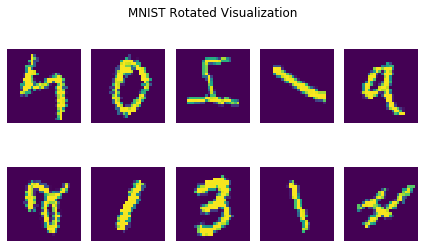

In [10]:
# Load dataset
train_loader, test_loader, image_shape = get_dataset('mnist', 1, 0, data_base_dir='../data/')

# Visualize dataset
fig, axs = plt.subplots(2, 5)
for ax, i in zip(axs.flatten(), np.arange(0, 10)):
    img, rot, img_rot = train_loader.dataset[i]
    ax.imshow(img.squeeze())
    ax.set_axis_off()
fig.suptitle("MNIST Rotated Visualization")
plt.tight_layout()
plt.show()


## Inference using VAE

In [11]:
out_base_dir = '../output/vae_mnist_20200619_132540'
vae_model = load_vae_model(out_base_dir, train_loader, test_loader, image_shape)


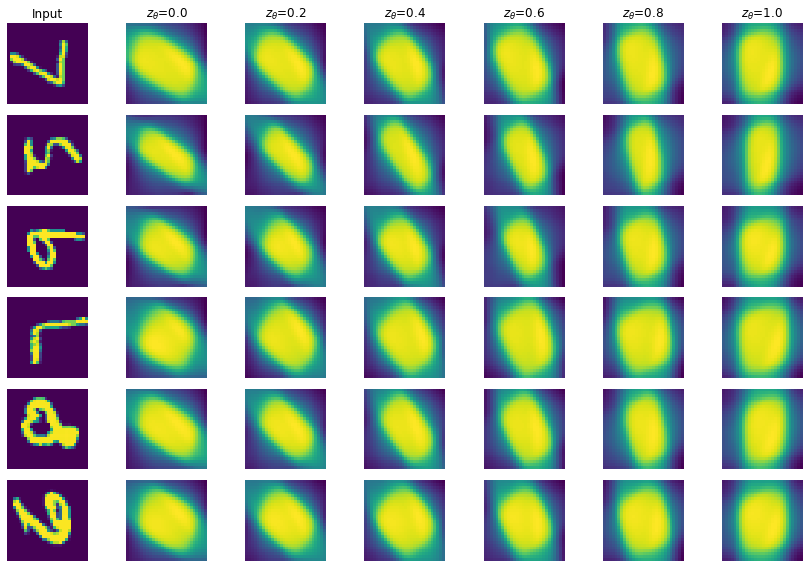

In [12]:
viz_num = 6
viz_theta_num = 6

trainset_idxs = np.linspace(0,len(test_loader.dataset)-1,viz_num).astype(int)
theta_inputs =  np.linspace(0,1,viz_theta_num).round(2)

w,h = plt.rcParams.get('figure.figsize')
fig, axs = plt.subplots(len(trainset_idxs), len(theta_inputs) + 1,figsize=(w*2,h*2))

for i, idx in enumerate(trainset_idxs):

    # Get input and visualize it
    y = test_loader.dataset[idx][0]
    ax = axs[i, 0]
    ax.imshow(y.squeeze())
    ax.set_axis_off()

    for j, theta_input in enumerate(theta_inputs):
        # Inference
        y_hat = vae_model.forward(vae_model.x_coord, y, theta_input=theta_input)[0].detach().numpy()

        # Visualize prediction
        ax = axs[i, j + 1]
        ax.imshow(y_hat.squeeze())
        ax.set_axis_off()

axs[0, 0].set_title('Input')
for ax, theta_input in zip(axs[0][1:], theta_inputs):
    ax.set_title(r'$z_\theta$={}'.format(theta_input))

plt.tight_layout()
plt.show()


## Inference using ours